In [1]:
# ==  Basic import == #
# plot within the notebook
%matplotlib inline
# No annoying warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as mpl

# Fit a Sinus function

In [11]:
x = np.linspace(0,20,100)

In [54]:
dy = np.random.normal(0,7,100)
y = 10*np.sin(x) + 4*x + dy

In [ ]:
 x: array([ 10.09134053,   3.99644833])

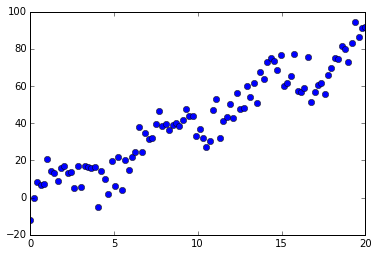

In [55]:
mpl.plot(x,y,"ob")

# The Fit class

In [94]:
class Chi2Fit( object ):
    
    def __init__(self, x, data, errors):
        """ init the class"""
        self.x    = np.asarray(x)
        self.data = np.asarray(data)
        self.errors = np.asarray(errors)
        self.npoints = len(data)
        
    def fit(self,guess):
        """ """
        from scipy.optimize import minimize
        self.fitout = minimize(self.chi2, guess)
        print self.fitout
        
    def get_model(self,parameters):
        """ """
        raise NotImplementedError(" CREATE IT IN YOUR CLASS") 
        
    def chi2(self,parameters):
        """ """
        res = self.data - self.get_model(parameters)
        chi2 = (res**2)/(self.errors**2)
        return np.sum(chi2)
    
    def plot(self, parameters):
        """ """
        fig = mpl.figure()
        ax = fig.add_subplot(1,1,1)
        ax.plot(self.x,self.data, 'ob')
        ax.plot(self.x,self.get_model(parameters),'-r')
        fig.show()
        
        
class SinFit( Chi2Fit ):
    def get_model(self,parameters):
        """ """
        A,B = parameters
        return A*np.sin(self.x) + B*self.x

class LinFit( Chi2Fit ):
    
    def get_model(self,parameters):
        """ """
        A,B = parameters
        return A + B*self.x

In [95]:
sinfit = SinFit(x,y,dy)
linfit = LinFit(x,y,dy)

In [96]:
sinfit.fit([1,4])

   status: 0
  success: True
     njev: 7
     nfev: 28
 hess_inv: array([[  9.95504880e-03,   1.44264226e-05],
       [  1.44264226e-05,   7.49988341e-05]])
      fun: 99.49045442605589
        x: array([ 10.09134053,   3.99644833])
  message: 'Optimization terminated successfully.'
      jac: array([ -9.53674316e-07,  -7.62939453e-06])


In [97]:
linfit.fit([1,4])

   status: 0
  success: True
     njev: 10
     nfev: 40
 hess_inv: array([[ 0.01804101, -0.00170722],
       [-0.00170722,  0.00021923]])
      fun: 1905.656375239467
        x: array([ 9.484183  ,  3.17854105])
  message: 'Optimization terminated successfully.'
      jac: array([ 0.,  0.])


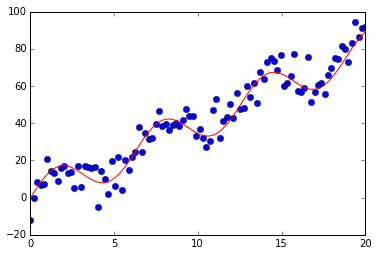

In [98]:
sinfit.plot(sinfit.fitout["x"])

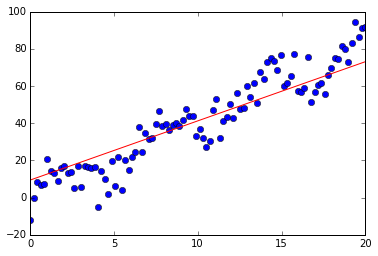

In [99]:
linfit.plot(linfit.fitout["x"])